<a href="https://colab.research.google.com/github/nyoons/ESAA/blob/main/Part_03_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EC%84%B8%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tensorflow 필사**
## **기본 분류 : 의류 이미지 분류**

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


## **패션 MNIST 데이터셋 임포트하기**
10개의 범주, 7만개의 흑백 이미지 데이터셋.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


레이블은 0부터 9까지의 정수 배열로 이미지에 있는 옷의 클래스를 나타낸다. 각 이미지는 하나의 레이블에 매핑되어 있음. 클래스의 이름을 넣기 위해 별도의 변수를 만들어 저장.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## **데이터 탐색**

* train

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

* test

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## **데이터 전처리**
픽셀 값의 범위가 0~255

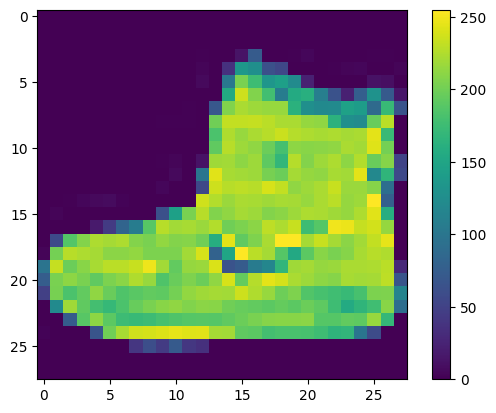

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하자.

In [10]:
# 꼭 훈련 세트와 테스트 세트를 동일하게 전처리

train_images = train_images / 255.0
test_images = test_images / 255.0

훈련 세트에서 처음 25개 이미지와 클래스 이름을 출력해보자. 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마치자.

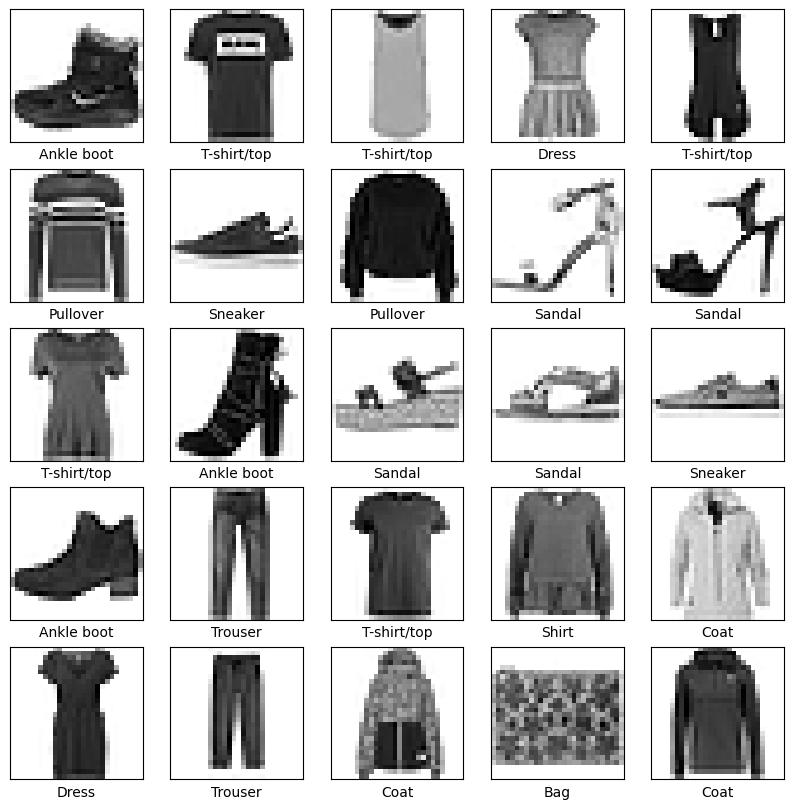

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## **모델 구성**
신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일함.

### 층 설정
신경망의 기본 빌딩 블록은 레이어. 레이어에 공급된 데이터로부터 표현을 추출한다.

간단한 층을 연결해 구성된다.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

훈련되며 가중치가 학습된다.

### 모델 컴파일
* 손실 함수 : 훈련 중 모델이 얼마나 정확한지 측정. 최소화 하자.
* 옵티마이저 : 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델 업데이트되는 과정.
* 매트릭 : 훈련 및 테스트 단계를 모니터링. 정확도를 사용하자.

등이 컴파일 단계에서 추가된다.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## **모델 훈련**
1. 훈련 데이터를 모델에 주입
2. 모델이 이미지와 레이블을 매핑하는 방법을 배움
3. 테스트 세트에 대한 예측을 만든다.
4. 예측이 test_labels와 일치하는지 확인

### 모델 피드

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4989 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3747 - accuracy: 0.8664
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3395 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3138 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2946 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2810 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2685 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2586 - accuracy: 0.9018
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2479 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.240

### 정확도 평가

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3583 - accuracy: 0.8702 - 655ms/epoch - 2ms/step

Test accuracy: 0.870199978351593


테스트 세트의 정확도가 훈련세트보다 조금 낮다. 훈련 세트와 테스트 세트의 정확도 사이의 차이는 과대적합 때문. 과대적합 : 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상.

### 예측하기

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


첫번째 예측을 확인해보자.

In [18]:
predictions[0]

array([8.08207457e-09, 1.39537635e-08, 1.00172461e-10, 1.17062722e-11,
       1.22060477e-08, 2.48084101e-03, 1.10749937e-07, 7.86391832e-03,
       8.10728318e-10, 9.89655197e-01], dtype=float32)

여기서 가장 높은 신뢰도를 가진 레이블을 찾아보자.

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

예측이 맞다.

10개 클래스에 대한 예측을 모두 그래프로 표현해보자.

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 예측 확인
i번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인해보자.

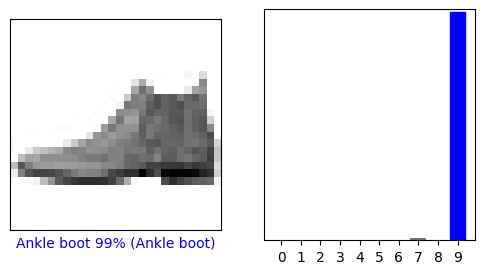

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

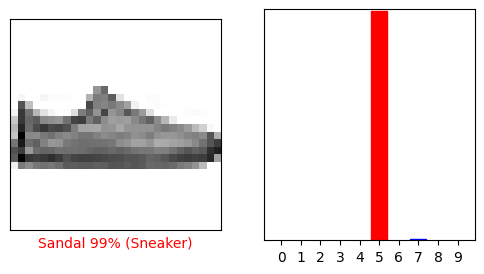

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

몇개 더 확인해보자. 올바르게 예측된 레이블은 파란색, 잘못 예측된 것은 빨강색. 신뢰도가 높을 때도 잘못 예측할 수 있다.

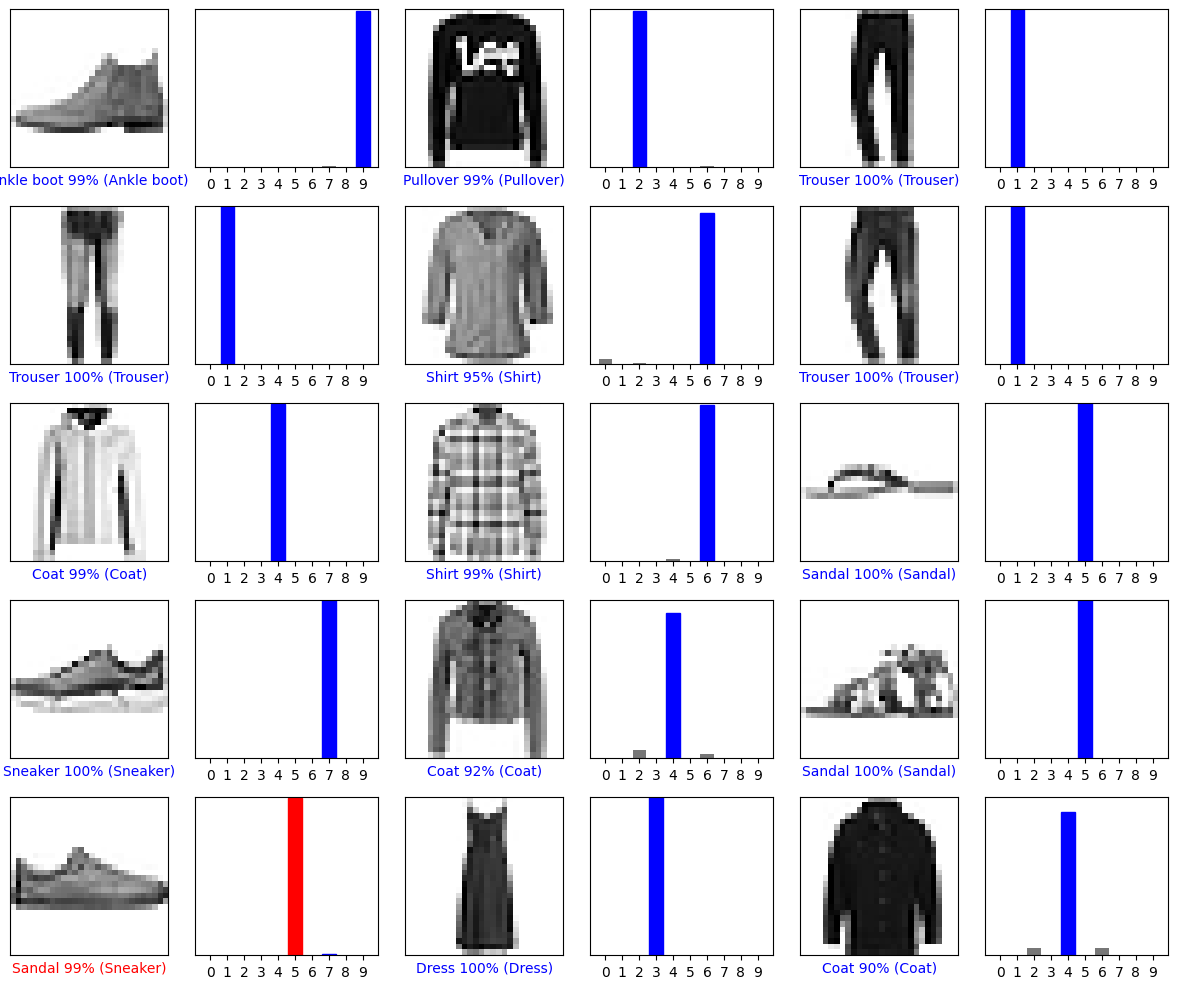

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## **훈련된 모델 사용하기**
훈련된 모델 사용해 한 이미지에 대한 예측을 만들자.

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


케라스에서는 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 한다.

In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
# 예측 만들자

predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 26ms/step
[[3.58840516e-05 6.07248301e-13 9.88129497e-01 2.36413833e-10
  4.44549462e-03 2.82752576e-12 7.38906534e-03 6.72525499e-17
  1.06447524e-10 2.61457111e-15]]


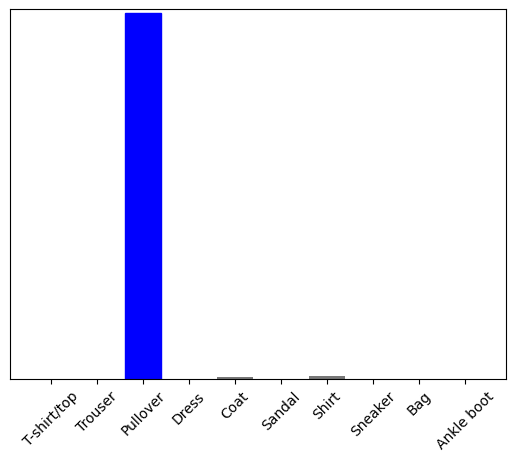

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [29]:
np.argmax(predictions_single[0])

2